# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
#calculate the mean and std
mu =np.mean(df['temperature'])
sigma = np.std(df['temperature'])

In [4]:
#https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

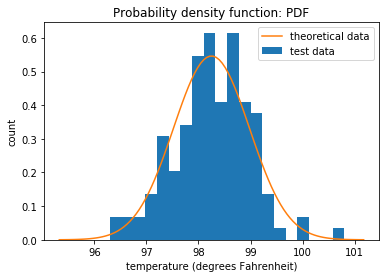

In [5]:
import matplotlib.mlab as mlab
plt.hist(df['temperature'],20,normed=True,label='test data')
plt.xlabel('temperature (degrees Fahrenheit)')
plt.ylabel('count')
plt.plot(x,mlab.normpdf(x, mu, sigma),label='theoretical data')
legend = plt.legend()
plt.title('Probability density function: PDF')
plt.show()

By plotting the PDF of a normal distribution, I can see the test data seems normal. 

In [6]:
def ecdf(data):
    
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    
    return x, y

In [7]:
x_test,y_test = ecdf(df['temperature'])

In [8]:
samples = np.random.normal(mu,sigma,10000)

In [9]:
x_theo,y_theo = ecdf(samples)

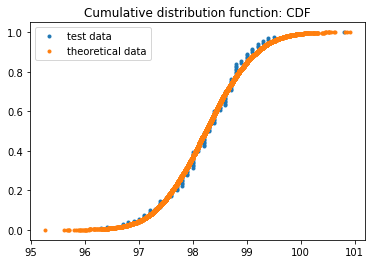

In [10]:
plt.plot(x_test,y_test,marker='.',linestyle='none',label='test data')
plt.plot(x_theo,y_theo,marker='.',linestyle='none',label='theoretical data')
plt.legend()
plt.title('Cumulative distribution function: CDF')
plt.show()

From the figure above, the test and theoretical CDF overlap well, which indicate the test may be normal.

In [11]:
import scipy.stats as stats

In [12]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

### 1. Is the distribution of body temperatures normal?
From the test above, the p-value is bigger than 0.05, so the data is normally distributed. This conclusion is demonstrated in the PDF and CDF plot using hacker statistic as well.


### 2. Is the sample size large? Are the observations independent?
The sample size is 130 and 65 of them are female samples. They are larger (larger than 30). Independent of the observations is desired in the study. But detailed information about it is not given here.

In [13]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

### 3. Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why? 
  - I will use one-sample test, since two-sample test require the tests are independed, which is not known here.
- In this situation, is it appropriate to use the  t or  z statistic?
  - Sample size larger than 30, and we know the population mean, so we can use z statistic.
- Now try using the other test. How is the result be different? Why?
  - The test result is the same. But we need to use a z table or normal distribution table when using z statistic, and use a t table for t statistic results.


#### z test
let's have the null hypothesis that the mean of the population is really 98.6 degrees F. Assume null hypothesis is true. Decision rule: if z is less than -1.96 or greater than 1.96, (fall in to the extrem 5% ) reject the null hypothesis. 


In [14]:
#the sample mean is:
print ('sample mean:', mu)
print ('sample std:', sigma)

sample mean: 98.24923076923078
sample std: 0.7303577789050377


In [15]:
def ztest(mu,popmean,sigma,length):
    z = (mu-popmean)/sigma*np.sqrt(len(df))
    return z

In [16]:
#sample size larger than 30, so we can use z statistic
z = ztest(mu,98.6,sigma,len(df))
z

-5.4759252020781162

In [17]:
#or we can do the test using building function in scipy
stats.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

#### z test conclusion
From the above one sample z test, the z is less than than the -1.96, so we will reject the null hypothesis. The mean of the population is not 98.6.

#### t test conclusion
the test result is the same, but we need to refer to a t-table.
with freedom = 30-1 = 29, the t score is 2.045 when the sum area of two tail = 0.05. The t score is -5.45 which is less than -2.045, so we reject the null hypothesis.

### 4. Draw a small sample of size 10 from the data and repeat both tests.
- Which one is the correct one to use?
  - When sample size is less than 30, we use t test.
- What do you notice? What does this tell you about the difference in application of the  t and  z statistic?
  - From the t test and z test calculated in the following cells, z statistic get a score of -1.4, and the t statistic get a score of -0.27. It seems that the z statistic is closer to the score with all the 130 samples. So z statistic is more close to the real situation.

#### t test

In [18]:
#select 10 samples
df_sample=df.sample(10,random_state=600)

In [19]:
#calculate the ttest value
stats.ttest_1samp(df_sample['temperature'],98.6)

Ttest_1sampResult(statistic=-0.27233853481658243, pvalue=0.79150672105059072)

#### t test conclusion
t score is -0.2723, which is larger than 2.045. So, we accept the null hypothesis

#### z test 
while the sample size is less than 30, we can not use the sample std to replace the population std in the equation. So I use the std of the 130 samples.

In [20]:
z = ztest(np.mean(df_sample.temperature),98.6,sigma,130)
z

-1.4050071242172992

#### z test conclusion
the z score is larger than -1.96, so we accept the null hypothesis.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?
- Start by computing the margin of error and confidence interval.
  - Let's set the rule that when the temperature is the extreme 5%（z score = 1.96）, we consider it to be "abnormal".

In [21]:
high = mu + 1.96*sigma
low = mu - 1.96*sigma

In [22]:
print('When the temperature is higher than %.2f' %high,', or, lower than %.2f'%low,'we consider it abnormal.')

When the temperature is higher than 99.68 , or, lower than 96.82 we consider it abnormal.


### 6. Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
  - I will use z test, since the sample size is lager than 30.
- Write a story with your conclusion in the context of the original problem.
  - Null hypothesis is that there is no significant difference between males and females in normal temperature. And first we calculate the z score. 

In [23]:
#get the df with female and df with male
df_f = df.loc[df['gender']=='F']
df_m = df.loc[df['gender']=='M']


In [24]:
# z test
z = stats.ttest_1samp(df_f.temperature,np.mean(df_m.temperature))
z

Ttest_1sampResult(statistic=3.1363704401455386, pvalue=0.0025841873130425367)

#### z test conclusion
Since z score is 3.13 which is larger than 1.96, we reject the null hypothesis. This means there is likely a significant difference between the two groups of sample.